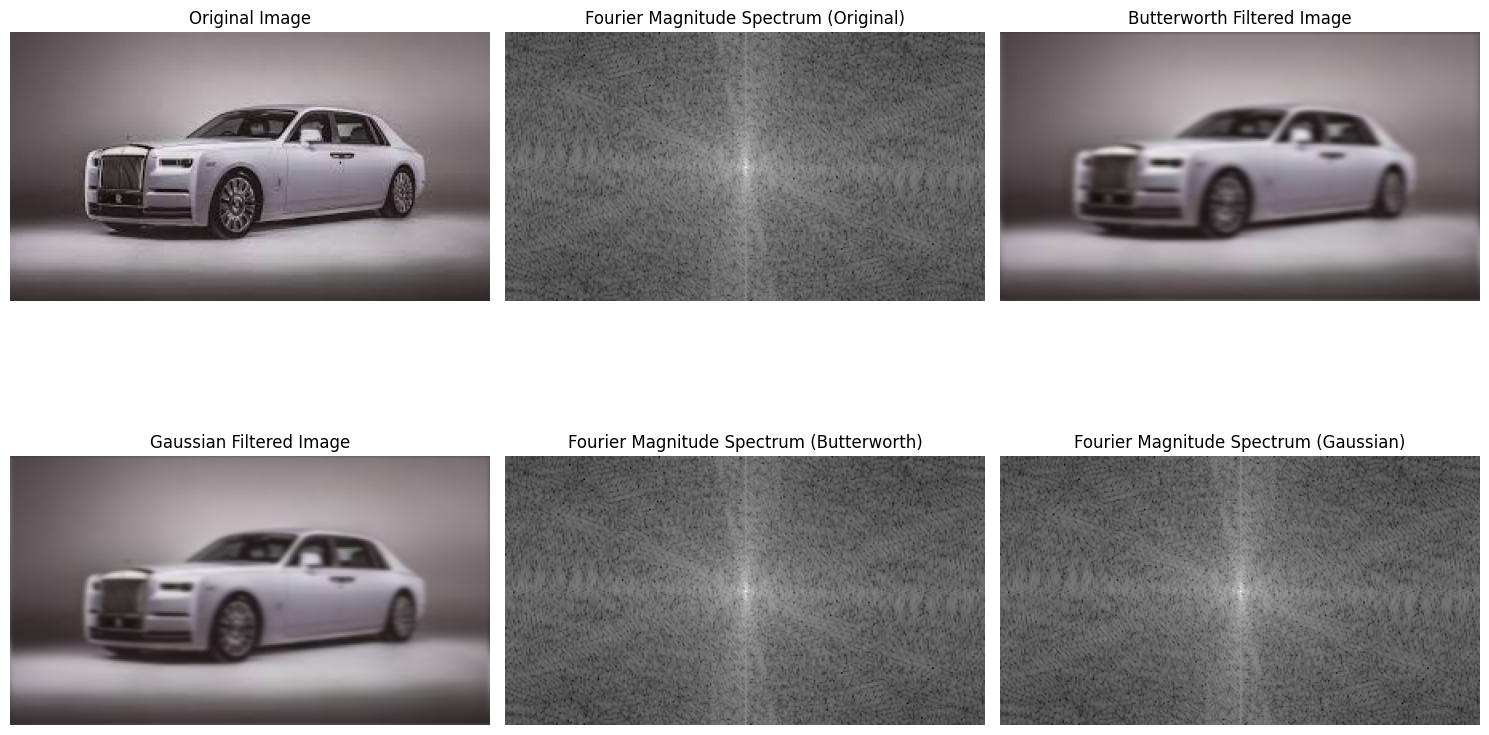

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def butterworth_filter(shape, cutoff, order=2):
    P, Q = shape
    x = np.linspace(-Q / 2, Q / 2 - 1, Q)
    y = np.linspace(-P / 2, P / 2 - 1, P)
    X, Y = np.meshgrid(x, y)
    D = np.sqrt(X**2 + Y**2)
    H = 1 / (1 + (D / cutoff)**(2 * order))
    return H

def gaussian_filter_shape(shape, cutoff):
    P, Q = shape
    x = np.linspace(-Q / 2, Q / 2 - 1, Q)
    y = np.linspace(-P / 2, P / 2 - 1, P)
    X, Y = np.meshgrid(x, y)
    D = np.sqrt(X**2 + Y**2)
    H = np.exp(-(D**2) / (2 * (cutoff**2)))
    return H

def apply_filter_fft(image_array, filter_kernel):

    f_transform = np.fft.fft2(image_array)
    f_transform_shifted = np.fft.fftshift(f_transform)
    magnitude_spectrum = np.log(1 + np.abs(f_transform_shifted))
    filtered_shifted = f_transform_shifted * filter_kernel
    filtered_ifft = np.fft.ifftshift(filtered_shifted)
    inverse_transform = np.fft.ifft2(filtered_ifft)
    filtered_image = np.abs(inverse_transform)
    return filtered_image, magnitude_spectrum
image_path = '/content/1.jpeg'

original_image = Image.open(image_path).convert('RGB')
original_array = np.array(original_image)
butter_filtered_channels = []
gaussian_filtered_channels = []
fourier_magnitudes = []
cutoff_frequency = 30
filter_order = 2
for channel in range(3):
    channel_data = original_array[:, :, channel]
    butter_filter_kernel = butterworth_filter(channel_data.shape, cutoff_frequency, filter_order)
    gaussian_filter_kernel = gaussian_filter_shape(channel_data.shape, cutoff_frequency)

    butter_filtered, butter_magnitude = apply_filter_fft(channel_data, butter_filter_kernel)
    butter_filtered_channels.append(butter_filtered)
    gaussian_filtered, gaussian_magnitude = apply_filter_fft(channel_data, gaussian_filter_kernel)
    gaussian_filtered_channels.append(gaussian_filtered)

    _, original_magnitude = apply_filter_fft(channel_data, np.ones_like(butter_filter_kernel))
    fourier_magnitudes.append(original_magnitude)
butter_filtered_rgb = np.stack(butter_filtered_channels, axis=2)
butter_filtered_rgb = np.clip(butter_filtered_rgb, 0, 255).astype(np.uint8)

gaussian_filtered_rgb = np.stack(gaussian_filtered_channels, axis=2)
gaussian_filtered_rgb = np.clip(gaussian_filtered_rgb, 0, 255).astype(np.uint8)
butter_image = Image.fromarray(butter_filtered_rgb)
gaussian_image = Image.fromarray(gaussian_filtered_rgb)
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')
plt.subplot(2, 3, 2)
plt.imshow(np.mean(fourier_magnitudes, axis=0), cmap='gray')
plt.title('Fourier Magnitude Spectrum (Original)')
plt.axis('off')
plt.subplot(2, 3, 3)
plt.imshow(butter_image)
plt.title('Butterworth Filtered Image')
plt.axis('off')
plt.subplot(2, 3, 4)
plt.imshow(gaussian_image)
plt.title('Gaussian Filtered Image')
plt.axis('off')
plt.subplot(2, 3, 5)
plt.imshow(np.mean([butter_magnitude for _ in range(3)], axis=0), cmap='gray')
plt.title('Fourier Magnitude Spectrum (Butterworth)')
plt.axis('off')
plt.subplot(2, 3, 6)
plt.imshow(np.mean([gaussian_magnitude for _ in range(3)], axis=0), cmap='gray')
plt.title('Fourier Magnitude Spectrum (Gaussian)')
plt.axis('off')
plt.tight_layout()
plt.show()
